<a href="https://colab.research.google.com/github/imohamedimran/Apartment-price-prediction/blob/master/SentimentAnalysis_Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
import pandas as pd
import time
import re


In [ ]:
consumer_key = "rMmB9WZb9Qh8nhfxE8KFI6uVv" 
consumer_secret = "9tlQbHOUEsXDPjKa4wBEbZ4Uqx6CKydOEcDVOdZE6mK9kGBtL7"
access_token = "1517234325686824962-GtDIsU7hR7qqfsqjiUwkyaWlplKdKS"
access_token_secret = "ddMLKjogTF72djwgXc8UTvWPrYTAsae3I0x2iX52dlaJ3"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
def keyword_to_csv(keyword,recent):
    try:
        tweets = tweepy.Cursor(api.search,q=keyword).items(recent) #creates query method
        tweets_list = [[tweet.text] for tweet in tweets] 
#pulls text information from tweets
        df = pd.DataFrame(tweets_list,columns=['Text']) 
#creates a pandas dataframe
        df.to_csv('{}.csv'.format(keyword), sep=',', index = False) 
 #creates a csv from data frame
    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)

In [ ]:
keyword = 'UCMO' #to exclude retweets
recent  = 3000
keyword_to_csv(keyword, recent)

In [ ]:
df = pd.read_csv('/content/UCMO.csv') #loads csv file into pandas dataframe
pd.options.display.max_colwidth = 200 
df.head()

,Text
0,"If you’re in the mood for a good horror movie, this article goes over some good ones that are available on Netflix!… https://t.co/vaFNWutZMP"
1,"Have you signed up for our Harmon Professional Edge Program? If not, go to https://t.co/yWWYwKpVLD and it will take… https://t.co/NyFgrmwXuZ"
2,RT @ucmharmonintern: Outfront Media is hiring. To apply or learn more: https://t.co/IizQBfCFDY. https://t.co/HAq5sewPCk
3,Outfront Media is hiring. To apply or learn more: https://t.co/IizQBfCFDY. https://t.co/HAq5sewPCk
4,What made you want to be apart of the DMP program? Tell us in the replies! #DMP #whatinspiredyou


In [ ]:
re_list = ['@[A-Za-z0–9_]+', '#']
combined_re = re.compile( '|'.join( re_list) )

In [ ]:
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

In [ ]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [ ]:
print("Cleaning the tweets...\n")
cleaned_tweets = []
for i in range(0,46): 
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have ben processed".format(i+1,3000))                                                                  
    cleaned_tweets.append(cleaning_tweets((df.Text[i])))

Cleaning the tweets...



In [ ]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.update(["ucmo"])

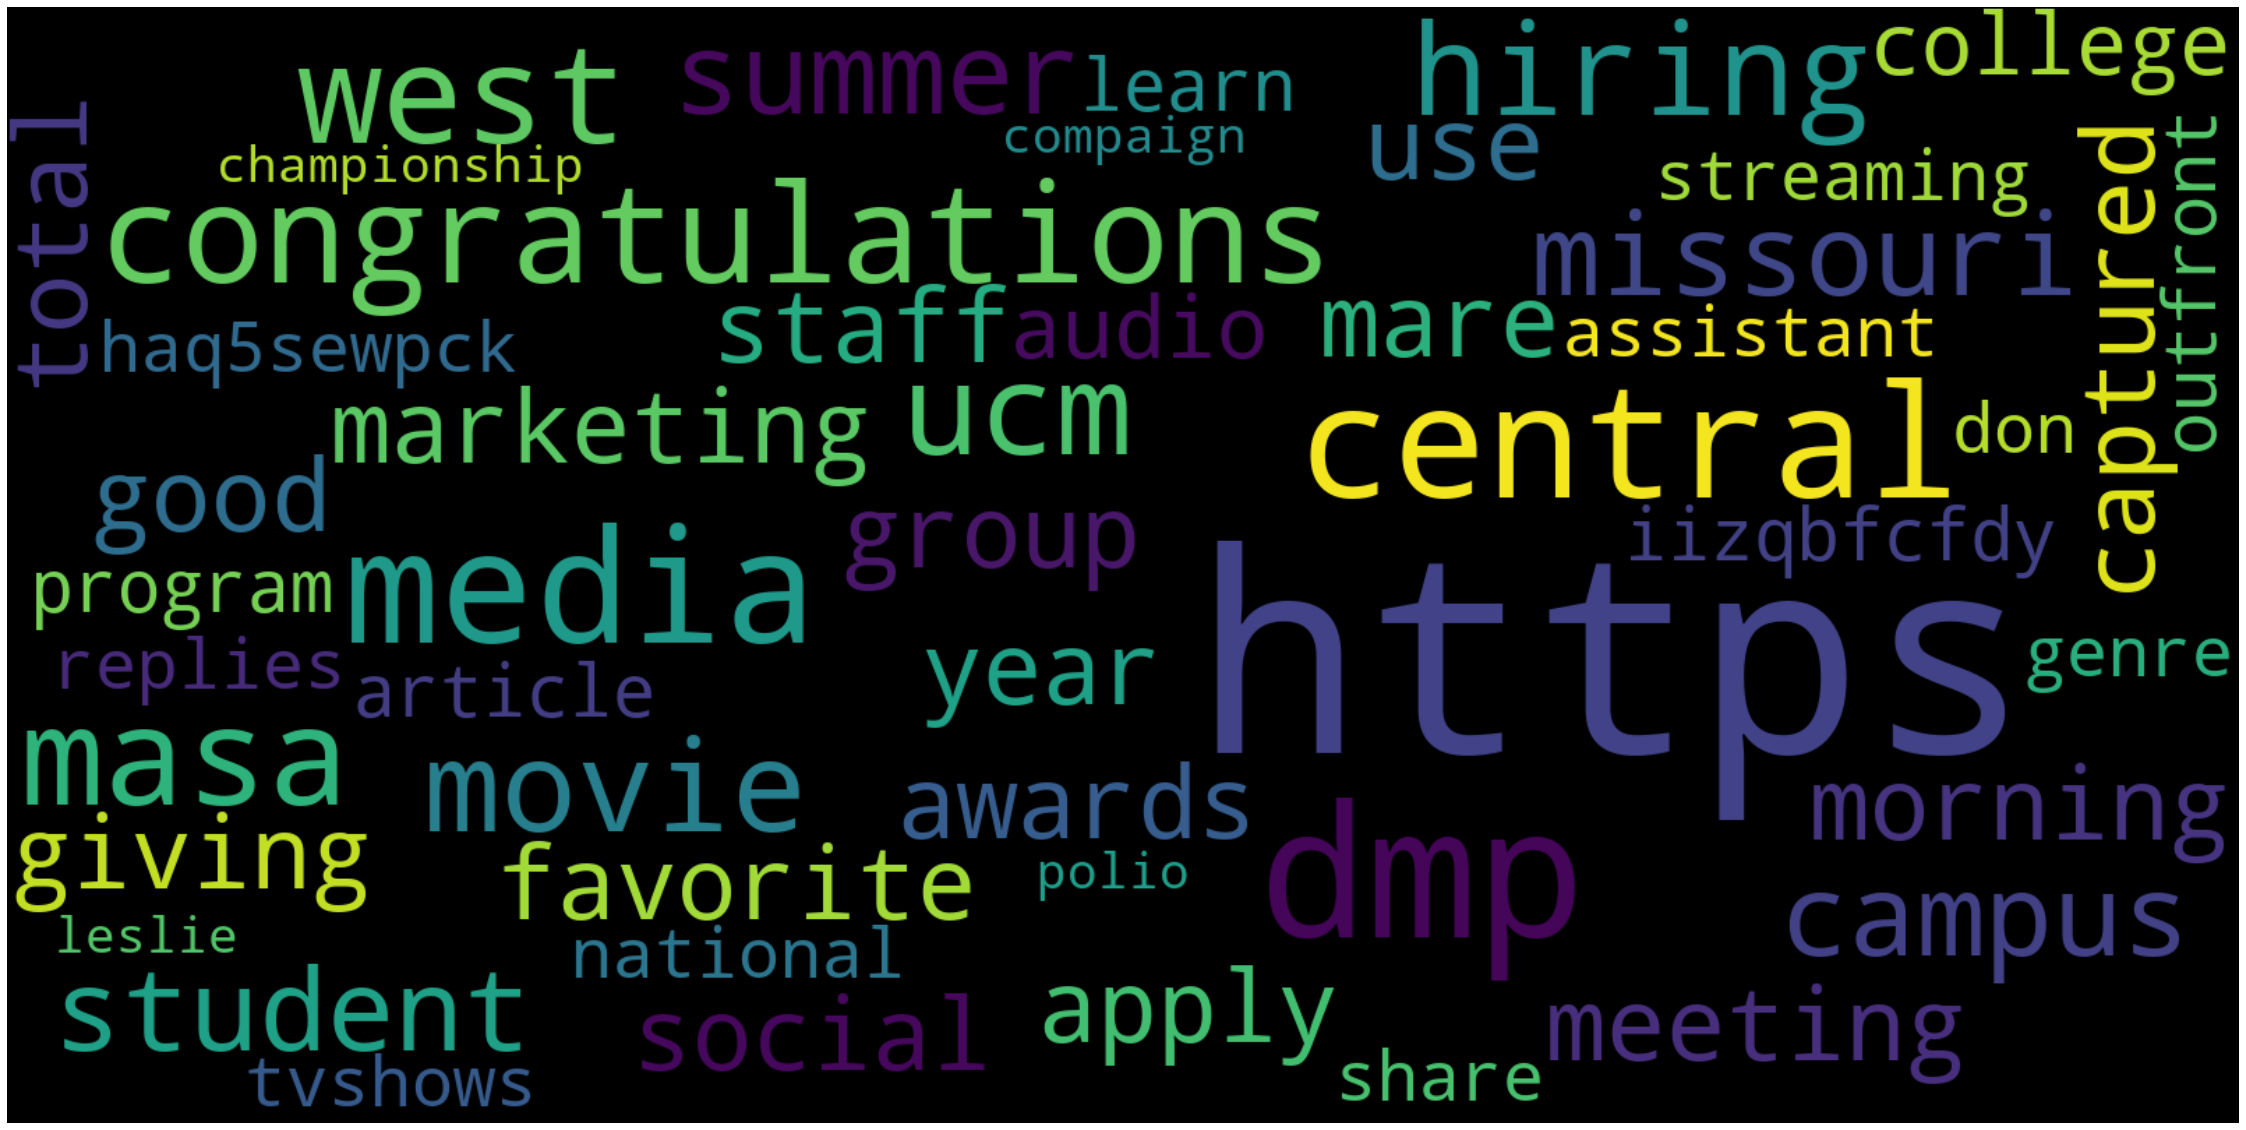

In [ ]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
twitter_auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(twitter_auth)

tweets = api.search("UCMO", count=100) 

print(tweets)

[Status(_api=<tweepy.api.API object at 0x7fa9fb6fa910>, _json={'created_at': 'Sun Apr 24 21:26:10 +0000 2022', 'id': 1518340546372292608, 'id_str': '1518340546372292608', 'text': 'If you’re in the mood for a good horror movie, this article goes over some good ones that are available on Netflix!… https://t.co/vaFNWutZMP', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/vaFNWutZMP', 'expanded_url': 'https://twitter.com/i/web/status/1518340546372292608', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 804363932542664704, 'id_str': '804363932542664704', 'name': 'UCM Di

In [ ]:
tweets[2:6]

[Status(_api=<tweepy.api.API object at 0x7fa9fb6fa910>, _json={'created_at': 'Sun Apr 24 16:00:46 +0000 2022', 'id': 1518258659213680642, 'id_str': '1518258659213680642', 'text': 'RT @ucmharmonintern: Outfront Media is hiring. To apply or learn more: https://t.co/IizQBfCFDY. https://t.co/HAq5sewPCk', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ucmharmonintern', 'name': 'Harmon College Internship Office', 'id': 740992575511764992, 'id_str': '740992575511764992', 'indices': [3, 19]}], 'urls': [{'url': 'https://t.co/IizQBfCFDY', 'expanded_url': 'http://bit.ly/3KIkpoA', 'display_url': 'bit.ly/3KIkpoA', 'indices': [71, 94]}], 'media': [{'id': 1518258583376388096, 'id_str': '1518258583376388096', 'indices': [96, 119], 'media_url': 'http://pbs.twimg.com/media/FRHwIzNWYAAV-NV.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FRHwIzNWYAAV-NV.jpg', 'url': 'https://t.co/HAq5sewPCk', 'display_url': 'pic.twitter.com/HAq5sewPCk', 'expanded_u

In [ ]:
import re
import pandas as pd
from textblob import TextBlob

# Storing features from the tweets that will be useful for ML later
# This is broken into features relating to the tweet (prefixed with 'tweet_') and use related ones (prefixed with 'user_')
df = pd.DataFrame(columns=('tweet_text', 'tweet_sentiment', 'tweet_subjectivity',
                           'user_followers_count', 'user_friends_count',
                           'user_account_age', 'user_verified',
                           'user_favourites_count', 'user_tweets',
                           'tweet_retweeted', 'tweet_retweet_count', 'tweet_favorite_count'))

# Remove duplicates
df.sort_values("tweet_text", inplace = True) 
df.drop_duplicates(subset ="tweet_text", keep = False, inplace = True) 

for tweet in tweets:
    sentimentText = TextBlob(tweet.text)
    df = df.append({'tweet_text': re.sub(r'http\S+', '', tweet.text), 
                    'tweet_sentiment': sentimentText.sentiment.polarity,
                    'tweet_subjectivity': sentimentText.sentiment.subjectivity,
                    'user_followers_count': tweet.user.followers_count, 
                    'user_friends_count': tweet.user.friends_count,
                    'user_account_age': tweet.user.created_at, 
                    'user_verified': tweet.user.verified,
                    'user_favourites_count': tweet.user.favourites_count,
                    'user_tweets': tweet.user.statuses_count,
                    'tweet_retweeted': tweet.retweeted,
                    'tweet_retweet_count': tweet.retweet_count,
                    'tweet_favorite_count': tweet.favorite_count},
                   ignore_index=True)

df.head(2)

,tweet_text,tweet_sentiment,tweet_subjectivity,user_followers_count,user_friends_count,user_account_age,user_verified,user_favourites_count,user_tweets,tweet_retweeted,tweet_retweet_count,tweet_favorite_count
0,"If you’re in the mood for a good horror movie, this article goes over some good ones that are available on Netflix!…",0.6,0.533333,152,108,2016-12-01 16:38:00,False,183,476,False,0,1
1,"Have you signed up for our Harmon Professional Edge Program? If not, go to and it will take…",0.1,0.100000,171,415,2020-09-01 13:31:06,False,38,247,False,0,0


In [ ]:
# Sentiment of the tweets - using TextBlob for this
print ("Total Tweet count: {}" .format(len(df)))

pos_count = 0
neg_count = 0
neut_count = 0

for index, tweet in df.iterrows():
    #print(tweet['tweet_sentiment'])
    if tweet['tweet_sentiment'] > 0:
        pos_count += 1
    elif tweet['tweet_sentiment'] < 0:
        neg_count += 1
    else:
        neut_count += 1

print("\nPercentage of positive tweets: {}%".format(pos_count*100/len(df)))
print("Percentage of negative tweets: {}%".format(neg_count*100/len(df)))
print("Percentage of neutral tweets: {}%".format(neut_count*100/len(df)))

Total Tweet count: 46

Percentage of positive tweets: 52.17391304347826%
Percentage of negative tweets: 0.0%
Percentage of neutral tweets: 47.82608695652174%
